In [3]:
#Data Pre-procesing Step
 # importing libraries
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

#importing datasets
data_set= pd.read_csv('user_data.csv')

In [2]:
data_set

,15624510,Male,19,19000,0
0,15810944,Male,35,20000,0
1,15668575,Female,26,43000,0
2,15603246,Female,27,57000,0
3,15804002,Male,19,76000,0
4,15728773,Male,27,58000,0
5,15598044,Female,27,84000,0
6,15694829,Female,32,150000,1
7,15600575,Male,25,33000,0
8,15727311,Female,35,65000,0
9,15570769,Female,26,80000,0


In [4]:
1. #Extracting Independent and dependent Variable
x= data_set.iloc[:,[2,3]].values
y= data_set.iloc[:,4].values

In [5]:
x

array([[    35,  20000],
       [    26,  43000],
       [    27,  57000],
       [    19,  76000],
       [    27,  58000],
       [    27,  84000],
       [    32, 150000],
       [    25,  33000],
       [    35,  65000],
       [    26,  80000],
       [    26,  52000],
       [    20,  86000],
       [    32,  18000],
       [    18,  82000],
       [    29,  80000],
       [    47,  25000],
       [    45,  26000],
       [    46,  28000],
       [    48,  29000],
       [    45,  22000],
       [    47,  49000]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [6]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)

In [7]:
x_test

array([[   45, 22000],
       [   26, 80000],
       [   18, 82000],
       [   32, 18000],
       [   35, 20000],
       [   47, 49000]], dtype=int64)

In [8]:
y_test

array([1, 0, 0, 0, 0, 1], dtype=int64)

In [9]:
# feature Scaling
from sklearn.preprocessing import StandardScaler
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

In [10]:
x_test

array([[ 1.41900117, -1.07104829],
       [-0.52413557,  0.70700683],
       [-1.3422984 ,  0.76831908],
       [ 0.08948656, -1.19367278],
       [ 0.39629762, -1.13236054],
       [ 1.62354187, -0.24333298]])

In [11]:
x_train

array([[-5.24135566e-01, -1.51364607e-01],
       [ 1.72581223e+00, -8.56455433e-01],
       [-6.26405920e-01, -7.33830941e-01],
       [-4.21865211e-01,  8.29631325e-01],
       [ 1.62354187e+00, -9.79079924e-01],
       [-1.24002805e+00,  5.84382342e-01],
       [-5.24135566e-01, -4.27269713e-01],
       [-4.21865211e-01,  3.25721306e-02],
       [ 1.41900117e+00, -9.48423802e-01],
       [ 3.96297623e-01,  2.47164991e-01],
       [ 8.94865600e-02,  2.85293544e+00],
       [ 1.52127152e+00, -8.87111556e-01],
       [-4.21865211e-01,  1.91600768e-03],
       [-1.24002805e+00, -1.16301666e+00],
       [-2.17324503e-01,  7.07006834e-01],
       [-1.13775769e+00,  8.90943571e-01]])

In [12]:
#Fitting Logistic Regression to the training set
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)

classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [13]:
classifier

LogisticRegression(random_state=0)

In [14]:
#Predicting the test set result
y_pred= classifier.predict(x_test)

In [15]:
y_pred

array([1, 0, 0, 0, 0, 1], dtype=int64)

In [16]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)

In [17]:
cm

array([[4, 0],
       [0, 2]], dtype=int64)

C:\Users\DEBAJIT\AppData\Local\Temp\ipykernel_1880\1944012017.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],


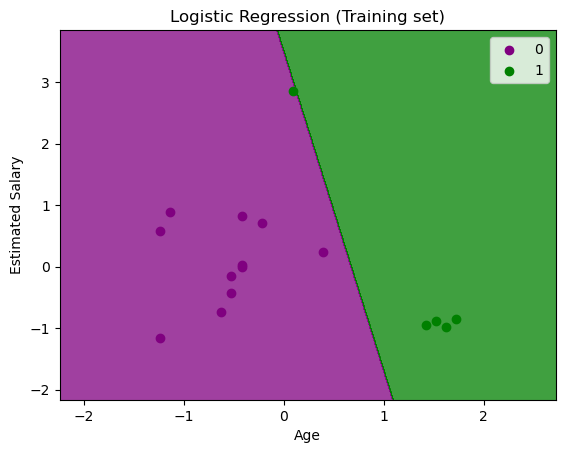

In [18]:
#Visualizing the training set result
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train

x1, x2 = nm.meshgrid(nm.arange(start = x_set[:,0].min() - 1, stop = x_set[:, 0].max()+1,step=0.01),nm.arange(start= x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))

mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),alpha = 0.75, cmap = ListedColormap(('purple','green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
  mtp.scatter(x_set[y_set == j,0], x_set[y_set == j, 1],
  c=ListedColormap(('purple','green'))(i),label =j)
mtp.title('Logistic Regression (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()
